## Reyes Bayesianas: Ejemplo explicado

Las redes bayesianas son conceptualmente simples. La posibilidad de automatizar la inferencia probabilística ha conducido al desarrollo de la Programación probabilística. En Programación probabilística, especificamos un modelo probabilístico completo escribiendo unos cuantos líneas de código y luego la inferencia se realiza en forma automática.

## PyMC3

PyMC3 es un paquete para Programación probabilística que utiliza el lenguaje de programación Python. Permite crear modelos probabilísticos usando una sintaxis intuitiva y fácil de leer que es muy similar a la sintaxis usada para describir modelos probabilísticos.

In [ ]:
# importando modulos necesarios
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import pymc3 as pm
import theano.tensor as tt
from sklearn import datasets
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

np.random.seed(1984) #replicar random

%matplotlib inline


# El problema de la hierba mojada

Supongamos que hay dos eventos los cuales pueden causar que la hierba esté húmeda: que el rociador esté activado o que esté lloviendo. También supongamos que la lluvia tiene un efecto directo sobre el uso del rociador (usualmente cuando llueve el rociador se encuentra apagado). Entonces la situación puede ser modelada con la siguiente red bayesiana.

https://es.wikipedia.org/wiki/Red_bayesiana#Ejemplo

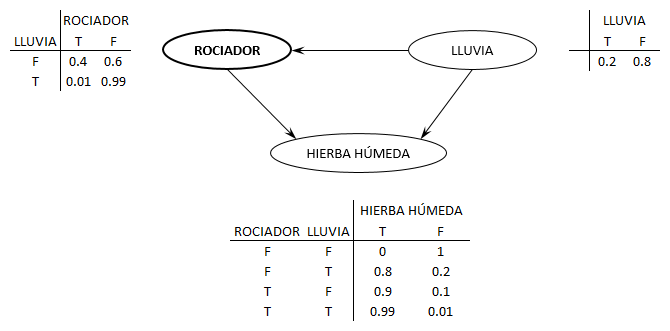



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
Sequential sampling (2 chains in 1 job)
BinaryGibbsMetropolis: [lluvia, rociador]


Sampling 2 chains for 5_000 tune and 20_000 draw iterations (10_000 + 40_000 draws total) took 12 seconds.
The number of effective samples is smaller than 10% for some parameters.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
Got error No model on context stack. trying to find log_likelihood in translation.
/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3_3x.py:102: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,
Got error No model on context stack. trying to find log_likelihood in translation.



Probabilidad de que la hierba este mojada por la lluvia: 0.358975
Probabilidad de que la hierba este mojada por el rociador: 0.646075


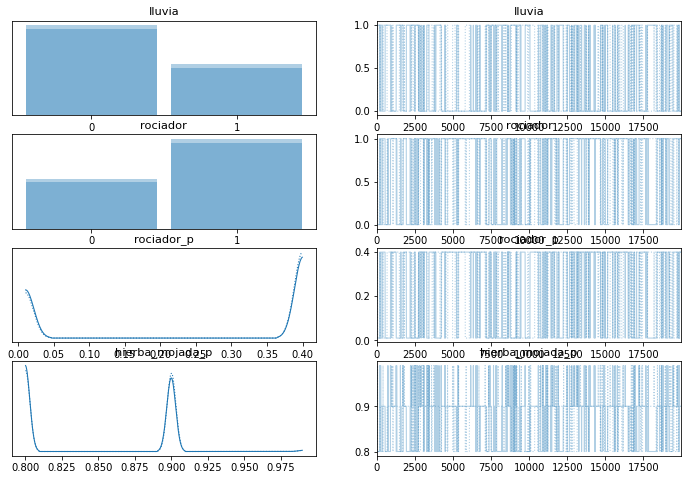

In [ ]:
# Problema de la hierba mojada
# https://es.wikipedia.org/wiki/Red_bayesiana#Ejemplo
niter = 10000  # 10000
tune = 5000  # 5000

modelo = pm.Model()

with modelo:
    tv = [1]
    lluvia = pm.Bernoulli('lluvia', 0.2, shape=1, testval=tv)
    rociador_p = pm.Deterministic('rociador_p', 
                                  pm.math.switch(lluvia, 0.01, 0.40))
    rociador = pm.Bernoulli('rociador', rociador_p, shape=1, testval=tv)
    hierba_mojada_p = pm.Deterministic('hierba_mojada_p', 
                pm.math.switch(lluvia, pm.math.switch(rociador, 0.99, 0.80),
                               pm.math.switch(rociador, 0.90, 0.0)))
    hierba_mojada = pm.Bernoulli('hierba_mojada', hierba_mojada_p,
                             observed=np.array([1]), shape=1)

    trace = pm.sample(20000, 
                      step=[pm.BinaryGibbsMetropolis([lluvia, rociador])], 
                      tune=tune, random_seed=124)

# pm.traceplot(trace)

dictionary = {
              'lluvia': [1 if ii[0] else 0 for ii in trace['lluvia'].tolist() ],
              'rociador': [1 if ii[0] else 0 for ii in trace['rociador'].tolist() ],
              'rociador_p': [ii[0] for ii in trace['rociador_p'].tolist()],
              'hierba_mojada_p': [ii[0] for ii in trace['hierba_mojada_p'].tolist()],
              }
df = pd.DataFrame(dictionary)

p_lluvia = df[(df['lluvia'] == 1)].shape[0] / df.shape[0]
print("\nProbabilidad de que la hierba este mojada por la lluvia: {0}"
      .format(p_lluvia))

p_rociador = df[(df['rociador'] == 1)].shape[0] / df.shape[0]
print("Probabilidad de que la hierba este mojada por el rociador: {0}"
      .format(p_rociador))

De acuerdo a los resultados de la red bayesiana, si vemos que la hierba esta mojada, la probabilidad de que este lloviendo es alrededor del 36%.

## Clasificador Bayes ingenuo

Es uno de los clasificadores más utilizados en Machine Learning por su simplicidad y rapidez. Es una técnica de clasificación supervisada basada en el teorema de Bayes que asume que existe una independencia entre los atributos (asume que la presencia de una característica particular en una clase no está relacionada con la presencia de cualquier otra característica. Por ejemplo, una fruta puede considerarse como una manzana si es roja, redonda y de aproximadamente 9 cm de diámetro). 

Se lo llama ingenuo ya que asumir independencia absoluta entre todos los atributos, no es algo que se suela dar en la realidad. El modelo Bayes ingenuo es fácil de construir y particularmente útil para conjuntos de datos muy grandes. A pesar de su simplicidad y de su irealista postulado de independencia, este clasificador se ha mostrado muy efectivo y se suele utilizar como el estándar para evaluar el rendimiento de otros modelos de Machine Learning.

El Clasificador Bayes ingenuo se utiliza en múltiples escenarios de la vida real, tales como:

    Clasificación de texto: clasifica documentos de texto, es decir, si un documento de texto pertenece a una o más categorías (clases).
    Análisis de sentimientos: analiza el tono de tweets, comentarios y revisiones, ya sean negativos, positivos o neutrales.
    Sistema de Recomendaciones: en combinación con el filtrado colaborativo se utiliza para construir sistemas de recomendación híbridos que ayudan a predecir si un usuario desea un recurso determinado o no.
    Detección de spam: Es un ejemplo de clasificación de texto. Mecanismo popular para distinguir el correo electrónico spam del correo electrónico legítimo.


Veamos un ejemplo con la ayuda de Scikit-Learn:

Saving iris.csv to iris (2).csv
Cantidad de errores de clasificación sobre un total de 105 casos: 7
Efectividad del algoritmo:  0.93


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


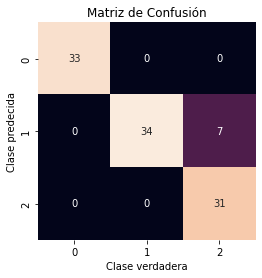

In [ ]:
# Ejemplo Naive Bayes usuando iris dataset

from google.colab import files
files.upload()
iris = pd.read_csv("iris.csv")

#Separo todos los datos con las características y las etiquetas o resultados
X = np.array(iris.drop(['variety'], 1))
y = np.array(iris['variety'])

# X = iris.data
# y = iris.target
 
# Dividir los datos en entrenamiento y evaluación
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, 
                                                    random_state=0)

# inicializar el clasificador Naive Bayes
bayes_ingenuo = GaussianNB()

# predicción 
y_pred = bayes_ingenuo.fit(X_train, y_train).predict(X_test)

# Matriz de confusión
cnf_matrix = confusion_matrix(y_test, y_pred)

print("Cantidad de errores de clasificación sobre un total de {0} casos: {1}"
      .format(y_test.shape[0],(y_test != y_pred).sum()))
print("Efectividad del algoritmo: {0: .2f}"
      .format(1 - (y_test != y_pred).sum()/y_test.shape[0]))

# Graficando la matriz de confusión
sns.heatmap(cnf_matrix.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('Clase verdadera')
plt.ylabel('Clase predecida')
plt.title('Matriz de Confusión')
plt.show()

En este sencillo ejemplo, podemos ver como el Clasificador Bayes ingenuo ha clasificado correctamente la mayoría de los casos del dataset iris, obteniendo un efectividad del 93 %.

Debido a que los clasificadores bayesianos ingenuos hacen suposiciones tan estrictas acerca de los datos, generalmente no funcionarán tan bien con modelos más complicados. Dicho esto, tienen varias ventajas:

    Son extremadamente rápidos tanto para entrenamiento como para predicción
    Son muy fácilmente interpretables
    Tienen muy pocos parámetros que necesiten optimizarse.

Estas ventajas significan que un clasificador bayesiano ingenuo es a menudo una buena opción como un modelo de clasificación inicial. Si obtenemos resultados satisfactorios, entonces tenemos un clasificador muy rápido, y muy fácil de interpretar. 

Estos son ejemplos de mecanismos de inferencia estocástica (bayesiana). La teoría Bayesiana es mucho más que un simple teorema de probabilidad, es una lógica para razonar *en las áreas grises entre la verdad absoluta y la incertidumbre total*. A menudo tenemos información sobre sólo una pequeña parte de lo que observamos. Sin embargo, todos queremos predecir algo basado en nuestras experiencias pasadas; y adaptamos nuestras creencias a medida que adquirimos nueva información. 

La inferencia estocástica (bayesiana) nos proporciona una forma de pensar racionalmente sobre el mundo que nos rodea!!



# Tarea

# Para la primera red bayesiana:

1) cual es la probabilidad de usar el rociador dado que llovio?

2) cual es la probabilidad de que la rama este seca a pesar de que se rocio?

3) Que pasa si no conozco nada del contexto para determinar la humedad de la hierba??

# Para el clasificador ingenio bayesiano:

1) que pasa si las variables descriptoras no son independientes entre ellas?

2) Pruebe el modelo para unos datos de entrada dados y comente el resultado


